# Apriori Algorithm

### What is Apriori?
- Apriori is an unsupervised machine learning algorithm used for frequent itemset mining and association rule learning.
- It helps in finding associations between items in large datasets.
- Commonly used in market basket analysis (e.g., "People who buy bread and butter often buy milk").

### 🔹 Core Idea

Apriori works on the principle:
If an itemset is frequent, then all of its subsets must also be frequent.
(Conversely, if a set is infrequent, none of its supersets can be frequent.)

This principle is called the Apriori Property.

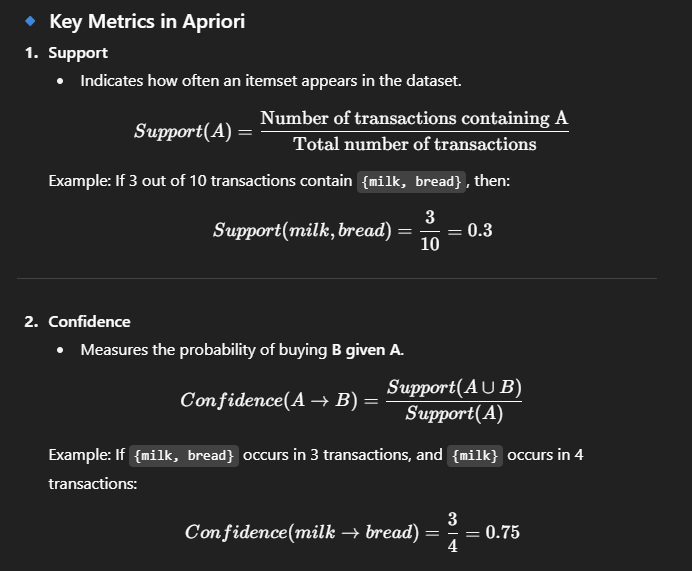
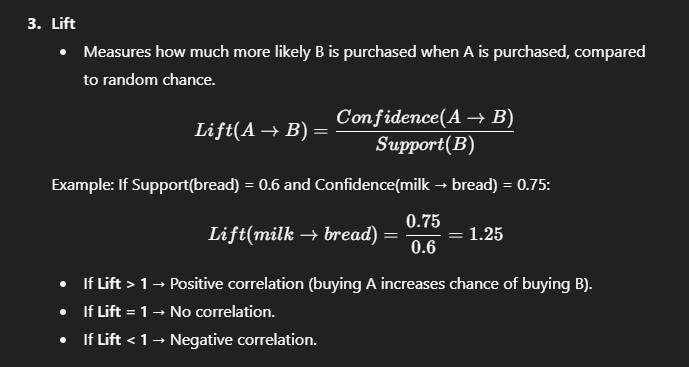

### 🔹 Steps of Apriori Algorithm (Working)

##### Set Minimum Support and Minimum Confidence
These are thresholds given by the analyst.

##### Generate Frequent Itemsets
- Step 1: Scan dataset to find frequent 1-itemsets (items with support ≥ min_support).
- Step 2: Generate candidate itemsets of size k (Ck) from frequent itemsets of size k−1 (Lk−1).
- Step 3: Prune candidates that have infrequent subsets.
- Step 4: Calculate support of candidates from dataset → keep only those ≥ min_support.

##### Generate Association Rules
- From frequent itemsets, generate rules of form A → B.
- Calculate confidence and lift for each.
- Keep rules that satisfy min_confidence.

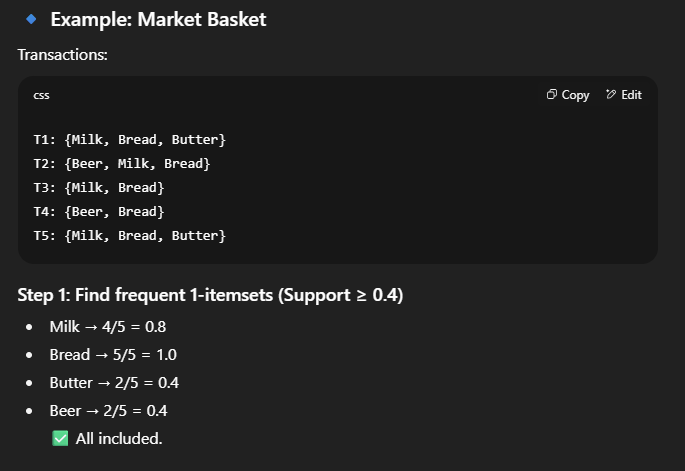
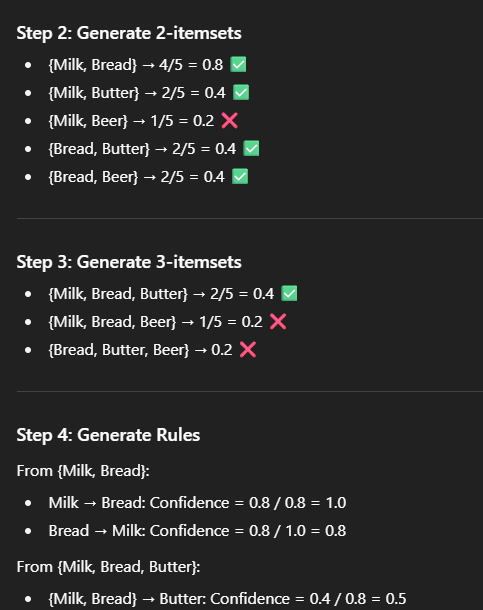

-----

In [19]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('modified_file.csv')
df.drop(columns='id', inplace= True)
df.head()

,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,item 17
0,NaN,Bread,NaN,NaN,Corn,Dill,NaN,Ice cream,NaN,NaN,NaN,NaN,Sugar,NaN,Yogurt,chocolate,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,NaN,Butter,NaN,NaN,Dill,NaN,Ice cream,NaN,Milk,NaN,NaN,NaN,NaN,Yogurt,chocolate,NaN
3,NaN,NaN,Butter,Cheese,NaN,Dill,NaN,NaN,NaN,Milk,Nutmeg,Onion,NaN,NaN,NaN,NaN,NaN
4,Apple,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
market = []
for i in range(0, df.shape[0]):
    cus =[]
    for j in df.columns: 
        if type(df[j][i]) == str:
            cus.append(df[j][i])
    market.append(cus)

In [22]:
import collections

In [23]:
l = []
for i in market:
    for j in i:
        l.append(j)

In [26]:
p = collections.Counter(l)

In [27]:
d = {
    'Item Name': p.keys(), 'values':p.values() 
}

In [35]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [31]:
tr = TransactionEncoder()

In [ ]:
tr.fit(market)


array([[False,  True, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       [ True, False,  True, ..., False,  True,  True],
       ...,
       [ True, False, False, ..., False, False,  True],
       [False, False,  True, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]], shape=(999, 16))

In [33]:
ds = pd.DataFrame(tr.transform(market), columns = tr.columns_)

In [34]:
ds

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [39]:
apriori(ds, min_support= 0.05, use_colnames= True, max_len= 3).sort_values(by= ['support'])

,support,itemsets
281,0.066066,"(Nutmeg, Dill, Bread)"
140,0.066066,"(Apple, Eggs, Bread)"
137,0.066066,"(Apple, Bread, Cheese)"
534,0.066066,"(Nutmeg, Eggs, Dill)"
431,0.067067,"(Ice cream, Eggs, Cheese)"
...,...,...
12,0.409409,(Sugar)
7,0.410410,(Ice cream)
2,0.420420,(Butter)
14,0.420420,(Yogurt)
